## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
colsWmissing = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[colsWmissing] = diabetes_data[colsWmissing].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

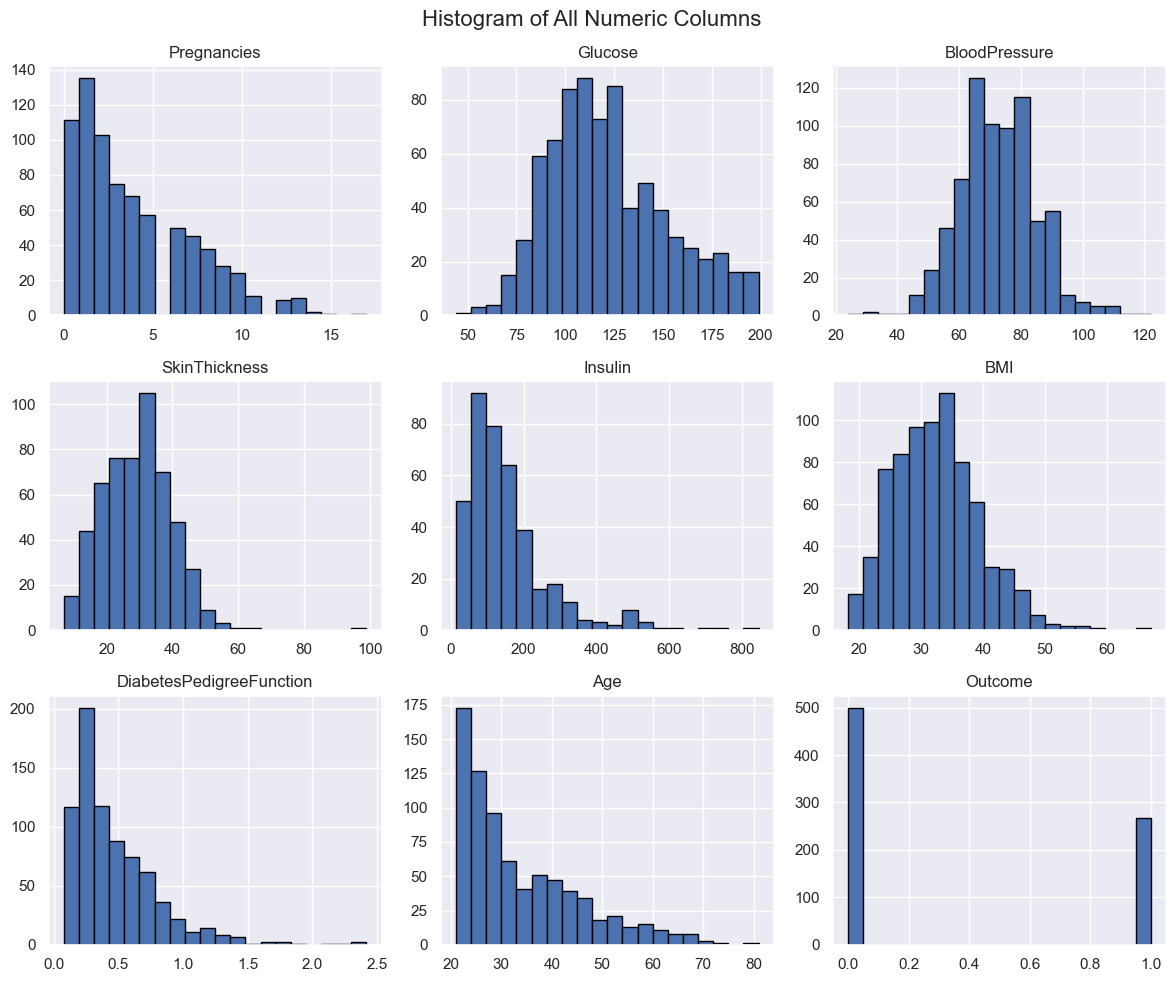

In [6]:
diabetes_data.hist(bins=20, figsize=(12,10), edgecolor='black')
plt.suptitle('Histogram of All Numeric Columns', fontsize=16)
plt.tight_layout()

plt.show()

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

/var/folders/vl/d4jp3x4n6pvgdsw9fp1v7m6h0000gn/T/ipykernel_55942/2273347448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
/var/folders/vl/d4jp3x4n6pvgdsw9fp1v7m6h0000gn/T/ipykernel_55942/2273347448.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

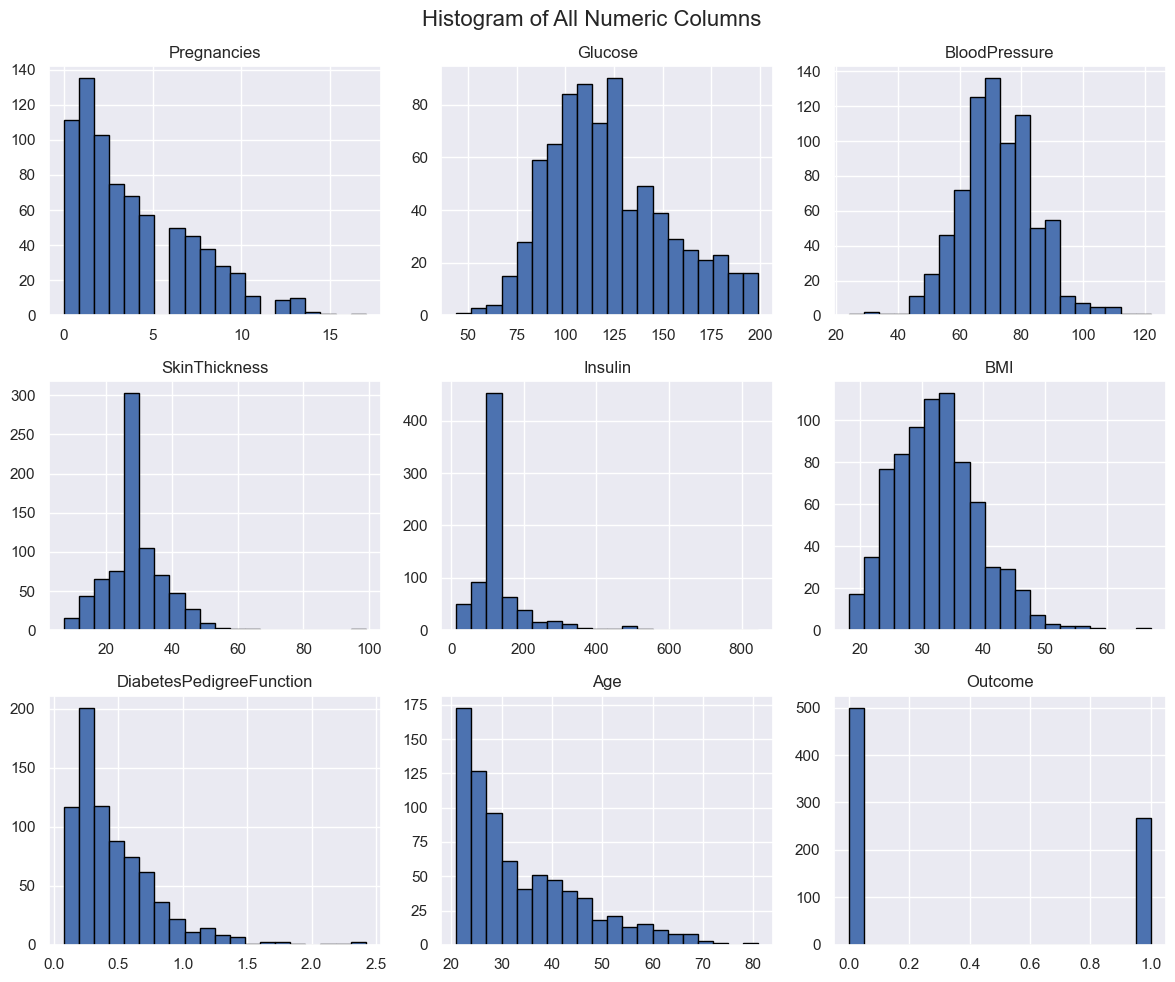

In [8]:
diabetes_data.hist(bins=20, figsize=(12,10), edgecolor='black')
plt.suptitle('Histogram of All Numeric Columns', fontsize=16)
plt.tight_layout()

plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


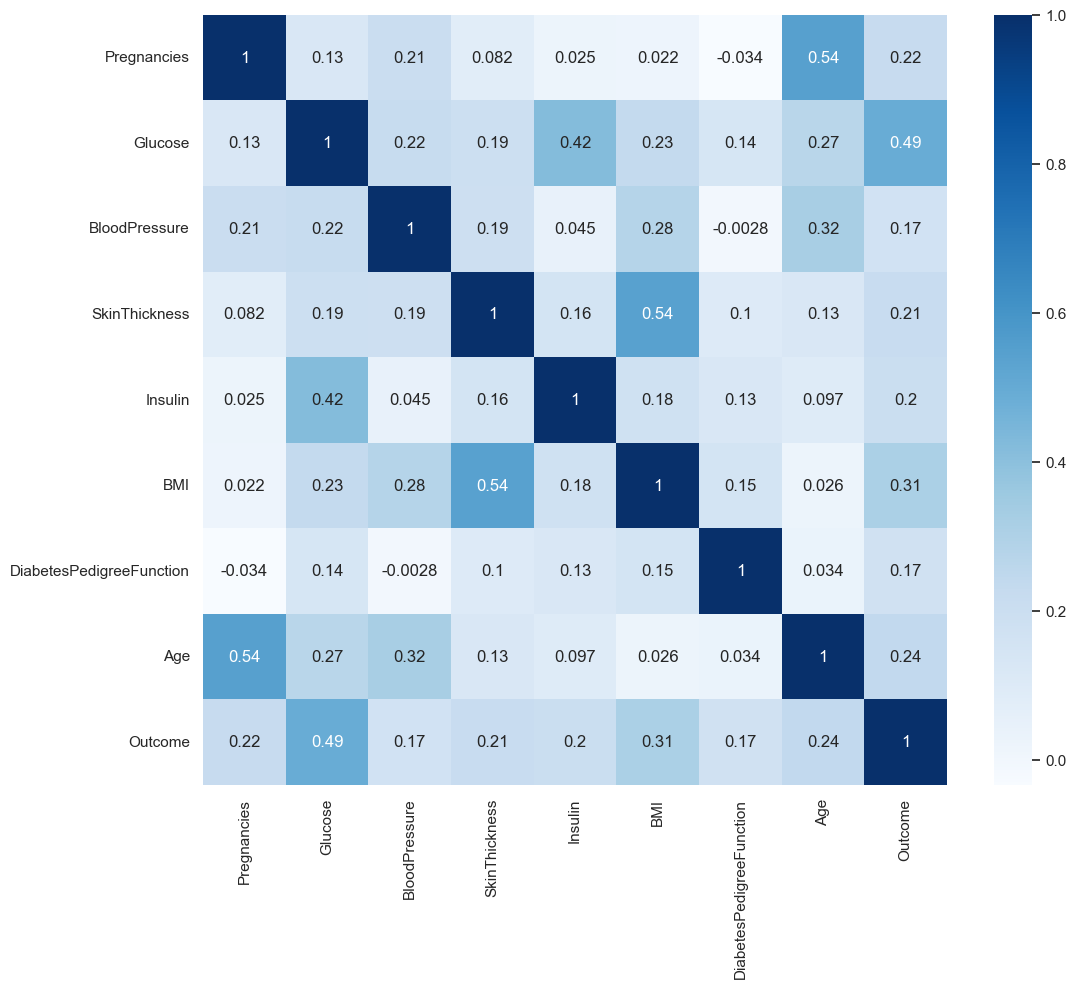

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [10]:
diabetes_fill = diabetes_data.copy()

X = diabetes_fill.drop(columns='Outcome')
y = diabetes_fill['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Avoid data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [13]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [14]:
for i in range(1, 10):
    print(f"k={i}: Train Score={train_scores[i-1]:.4f}, Test Score={test_scores[i-1]:.4f}")

k=1: Train Score=1.0000, Test Score=0.6667
k=2: Train Score=0.8510, Test Score=0.6710
k=3: Train Score=0.8547, Test Score=0.6710
k=4: Train Score=0.8417, Test Score=0.6926
k=5: Train Score=0.8399, Test Score=0.7013
k=6: Train Score=0.8231, Test Score=0.6840
k=7: Train Score=0.8343, Test Score=0.7316
k=8: Train Score=0.8212, Test Score=0.7359
k=9: Train Score=0.8268, Test Score=0.7316


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [15]:
best_k_train = train_scores.index(max(train_scores)) + 1
print(f"Best k on train dataset: {best_k_train}")

Best k on train dataset: 1


___***k=1***___ means that the KNN model the 1 nearest neighbors to make predictions.

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [16]:
best_k_test = test_scores.index(max(test_scores)) + 1
print(f"Best k on test dataset: {best_k_test}")

Best k on test dataset: 8


___***k=8***___ means that the KNN model uses the 8 nearest neighbors to make predictions. This value was selected because it produced the highest accuracy on the test dataset during evaluation.

Plot the train and test model performance by number of neighbors.

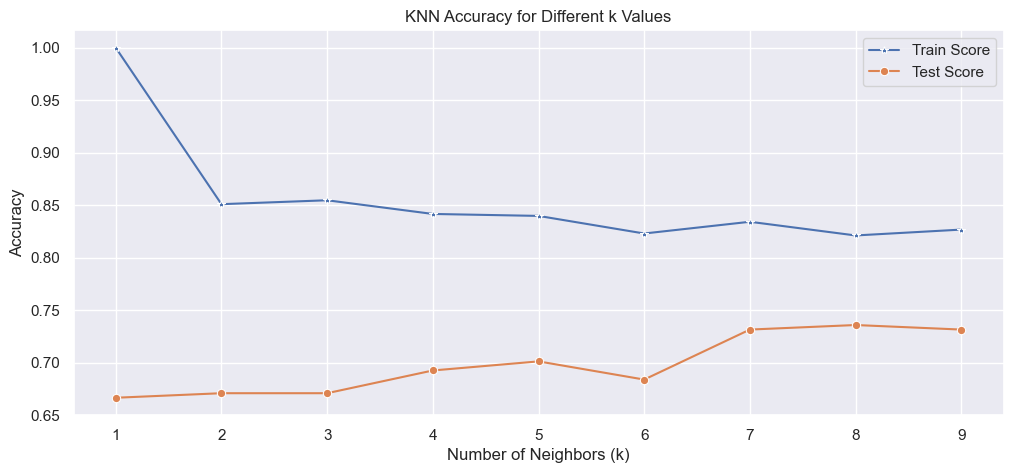

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values")
plt.legend()
# plt.grid(False)

plt.show()

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [18]:
best_knn = KNeighborsClassifier(n_neighbors=best_k_test)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

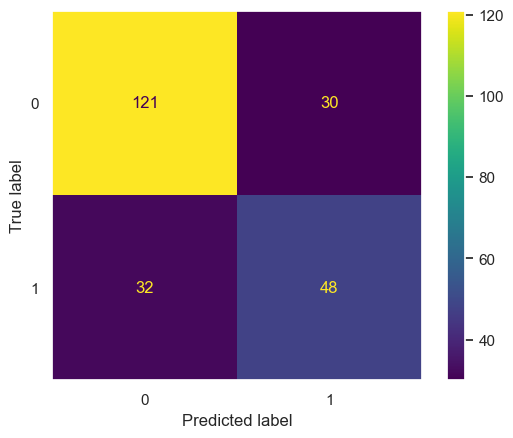

In [20]:
from  sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=pl, display_labels=[0,1])

fig, ax = plt.subplots()
cm_display.plot(ax=ax)
ax.grid(False) # Turn off grid lines

plt.show()

**<font color='teal'> Print the classification report </font>**

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, roc_auc_score

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.80      0.80       151
     Class 1       0.62      0.60      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231



The model performs better on ***Class 0*** - both precision and recall are around 0.80, indicating that it is generally good at correctly identifying and predicting ***Class 0*** samples.

However, the performance on ***Class 1*** is weaker - the recall is 0.60, which means that 40% of the actual ***Class 1*** samples were missclassified (i.e., the model failed to detect them).

The overall accuracy is ***0.73***, meaning that ***73%*** of all predictions were correct across both classes.

#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [23]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': np.int64(31)}


Here you can see that the ideal number of n_neighbors for this model is 31 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Split data into training and test sets
# Standardize features - StandardScaler(), scaler.fit_transform(), scaler.transform()

# Step3. Define parameter grid for tuning (Random Forest)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1) # 设为 n_jobs=-1，充分利用电脑的多核处理器，让 GridSearchCV 运行更快
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 50, 100, 200]})

In [25]:
# Step5. Evaluate model using best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.65      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [26]:
# Step6. Display best parameters and training score
print("Best Score:" + str(grid_search.best_score_))
print("Best Parameters:" + str(grid_search.best_params_))

Best Score:0.7764797507788163
Best Parameters:{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### 📊 Model Comparison: K-Nearest Neighbors vs. Random Forest

We trained and tuned both a ***K-Nearest Neighbors (KNN)*** model and a ***Random Forest Model*** using GridSearch with ***5-fold cross-validation***.

⚙️ ***Parameter Tuning Summary:***
- `KNN`: Tuned over a range of `n_neighbors` from 1 to 50
- `Random Forest`: Tuned over a grid of `n_estimators`, `max_depth`, `in_samples_split`, `min_samples_leaf`, and `bootstrap`

📈 ***Best Cross-Validated Scores:***
- `KNN` Best Accuracy: 0.7526 (with n_neighbors = 31)
- `Random Forest` Best Accuracy: 0.7765 (with optimal parameter set)

Although both models were tuned using the same ***cross-validation strategy*** and scored based on accuracy, the ***Random Forest Model*** achieved a higher validation score, indicating better generalization performance on unseen data.

📋 ***Test Set Performance:***
| Metric              | KNN   | Random Forest |
|---------------------|-------|----------------|
| Accuracy            | 0.73  | 0.76           |
| Precision (Class 1) | 0.62  | 0.65           |
| Recall (Class 1)    | 0.60  | 0.64           |
| F1-score (Class 1)  | 0.61  | 0.65           |

### 🧠 Conclusion:

While KNN is simple and intuitive, it is sensitive to the choice of `k` and can struggle on high-dimensional or imbalanced datasets. In contrast, Random Forest is a powerful ensemble method that tends to handle both feature interactions and class imbalance better through randomized decision trees and internal bootstrapping.

    * Therefore, based on both cross-validation and test set performance, Random Forest is the better performaning model in this case.